# Урок 8. GAN

Обучите нейронную сеть любой архитектуры, которой не было на курсе, либо нейронную сеть разобранной архитектуры, но на том датасете, которого не было на уроках. Сделайте анализ того, что вам помогло в улучшения работы нейронной сети 

In [ ]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import IPython
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

shape = 28
def preprocess_images(imgs, shape=28):
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(shape, shape, 1), (shape, shape)], sample_img.shape # 28x28 и только 1 канал
    return imgs / 255.0

# Подготовим данные

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], shape, shape, 1)
test_images = test_images.reshape(test_images.shape[0], shape, shape, 1)

train_images = preprocess_images(train_images, shape=shape)
test_images = preprocess_images(test_images, shape=shape)

# Создаём слои модели

In [3]:
model = keras.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(shape, shape, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Тренируем модель

In [4]:
model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Точность: {test_acc}')

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1998 - accuracy: 0.9397
Epoch 2/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0854 - accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0668 - accuracy: 0.9802
Epoch 4/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0547 - accuracy: 0.9834
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0354 - accuracy: 0.9893
Точность: 0.989300012588501


# Делаем предсказания

313/313 [==============================] - 1s 3ms/step


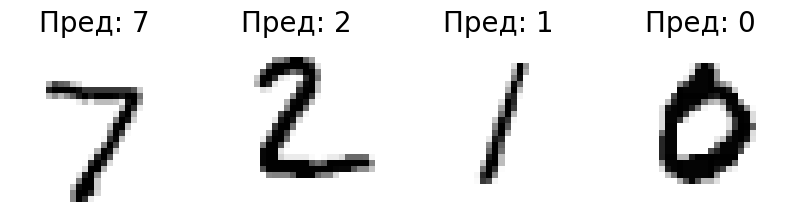

In [5]:
preds = model.predict(test_images)

plt.figure(figsize=[10, 10])

for i in range(1, 5):
    n = i-1
    plt.subplot(2, 4, i)
    plt.imshow(test_images[n].reshape(28, 28), cmap=plt.cm.binary)
    plt.title("Пред: " + str(np.argmax(preds[n], axis=0)), size=20)
    plt.axis('off')

plt.show()